## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [18]:
import os
import keras
import itertools
from keras.layers import BatchNormalization, Dropout
from keras import regularizers
from keras import optimizers
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [14]:
train, test = keras.datasets.cifar10.load_data()

In [30]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [31]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [70]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drop_ratio='', regual_ratio=''):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
#             input_layer = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   kernel_regularizer=regularizers.l2(l = regual_ratio),
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drop_ratio)(x)
#             x = regularizers.l2(l = regual_ratio)(x)
        else:
#             x = BatchNormalization()(x)

            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizers.l2(l = regual_ratio),
                                  )(x)
            
            x = BatchNormalization()(x)
            x = Dropout(drop_ratio)(x)
#             x = regularizers.l2(l = regual_ratio)(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [81]:
"""Code Here
設定超參數
"""
drop_ratio = [0.2, 0.5, 0.7]
regual_ratio = [0.01, 0.05, 0.1]
b_size = 128
epochs = 50


In [82]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for d_rate in drop_ratio:
    for r_rate in regual_ratio:
        model = build_mlp(input_shape=x_train.shape[1:], regual_ratio=r_rate, drop_ratio=d_rate)
        model.summary()
        optimizer = optimizers.Adam()
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
        model.fit(x_train, y_train,
                validation_data=(x_test, y_test),
                epochs = epochs,
                batch_size = b_size,
                shuffle=True,
                 )
        tag = f'd_rate_{d_rate}_r_rate_{r_rate}'
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        results[tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

    

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_79 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_80 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0  

50000/50000 [==============================] - 16s 329us/step - loss: 1.8768 - accuracy: 0.3888 - val_loss: 2.1008 - val_accuracy: 0.2784
Epoch 44/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.8880 - accuracy: 0.3867 - val_loss: 2.2416 - val_accuracy: 0.2485
Epoch 45/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.8874 - accuracy: 0.3909 - val_loss: 2.1665 - val_accuracy: 0.2902
Epoch 46/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.8870 - accuracy: 0.3882 - val_loss: 2.1228 - val_accuracy: 0.2801
Epoch 47/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.8804 - accuracy: 0.3863 - val_loss: 2.1661 - val_accuracy: 0.2777
Epoch 48/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.8695 - accuracy: 0.3907 - val_loss: 2.1454 - val_accuracy: 0.2627
Epoch 49/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.8683 - accuracy: 0.3915 - va

50000/50000 [==============================] - 17s 340us/step - loss: 2.2083 - accuracy: 0.3336 - val_loss: 2.3857 - val_accuracy: 0.2517
Epoch 36/50
50000/50000 [==============================] - 17s 348us/step - loss: 2.2327 - accuracy: 0.3310 - val_loss: 2.5814 - val_accuracy: 0.1991
Epoch 37/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.2265 - accuracy: 0.3314 - val_loss: 2.6432 - val_accuracy: 0.2093
Epoch 38/50
50000/50000 [==============================] - 18s 350us/step - loss: 2.1850 - accuracy: 0.3359 - val_loss: 2.3108 - val_accuracy: 0.2670
Epoch 39/50
50000/50000 [==============================] - 17s 332us/step - loss: 2.2110 - accuracy: 0.3349 - val_loss: 2.6148 - val_accuracy: 0.2043
Epoch 40/50
50000/50000 [==============================] - 17s 338us/step - loss: 2.1981 - accuracy: 0.3379 - val_loss: 2.4692 - val_accuracy: 0.2463
Epoch 41/50
50000/50000 [==============================] - 17s 345us/step - loss: 2.2010 - accuracy: 0.3381 - va

50000/50000 [==============================] - 16s 324us/step - loss: 2.3498 - accuracy: 0.3193 - val_loss: 3.0360 - val_accuracy: 0.1365
Epoch 28/50
50000/50000 [==============================] - 16s 322us/step - loss: 2.3498 - accuracy: 0.3224 - val_loss: 2.6467 - val_accuracy: 0.2063
Epoch 29/50
50000/50000 [==============================] - 16s 330us/step - loss: 2.3804 - accuracy: 0.3158 - val_loss: 2.9887 - val_accuracy: 0.2073
Epoch 30/50
50000/50000 [==============================] - 17s 333us/step - loss: 2.3448 - accuracy: 0.3172 - val_loss: 2.6913 - val_accuracy: 0.1918
Epoch 31/50
50000/50000 [==============================] - 17s 346us/step - loss: 2.3264 - accuracy: 0.3223 - val_loss: 2.9140 - val_accuracy: 0.1648
Epoch 32/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.3543 - accuracy: 0.3167 - val_loss: 2.6571 - val_accuracy: 0.2505
Epoch 33/50
50000/50000 [==============================] - 17s 338us/step - loss: 2.3198 - accuracy: 0.3208 - va

50000/50000 [==============================] - 16s 318us/step - loss: 2.1524 - accuracy: 0.2984 - val_loss: 2.2089 - val_accuracy: 0.2757
Epoch 20/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.1498 - accuracy: 0.2945 - val_loss: 2.4579 - val_accuracy: 0.2045
Epoch 21/50
50000/50000 [==============================] - 16s 319us/step - loss: 2.1400 - accuracy: 0.3021 - val_loss: 2.3689 - val_accuracy: 0.2299
Epoch 22/50
50000/50000 [==============================] - 16s 325us/step - loss: 2.1573 - accuracy: 0.2949 - val_loss: 2.3793 - val_accuracy: 0.2217
Epoch 23/50
50000/50000 [==============================] - 16s 316us/step - loss: 2.1588 - accuracy: 0.2919 - val_loss: 2.6648 - val_accuracy: 0.1732
Epoch 24/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.1452 - accuracy: 0.2938 - val_loss: 2.2797 - val_accuracy: 0.2669
Epoch 25/50
50000/50000 [==============================] - 16s 316us/step - loss: 2.1591 - accuracy: 0.2919 - va

50000/50000 [==============================] - 16s 314us/step - loss: 2.4721 - accuracy: 0.2826 - val_loss: 2.8042 - val_accuracy: 0.1984
Epoch 12/50
50000/50000 [==============================] - 16s 315us/step - loss: 2.4799 - accuracy: 0.2823 - val_loss: 2.6359 - val_accuracy: 0.2222
Epoch 13/50
50000/50000 [==============================] - 16s 313us/step - loss: 2.4599 - accuracy: 0.2841 - val_loss: 2.6290 - val_accuracy: 0.1991
Epoch 14/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.4827 - accuracy: 0.2816 - val_loss: 2.8183 - val_accuracy: 0.1916
Epoch 15/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.4616 - accuracy: 0.2853 - val_loss: 2.6172 - val_accuracy: 0.2433
Epoch 16/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.4559 - accuracy: 0.2841 - val_loss: 2.6464 - val_accuracy: 0.2575
Epoch 17/50
50000/50000 [==============================] - 17s 334us/step - loss: 2.4597 - accuracy: 0.2844 - va

50000/50000 [==============================] - 17s 337us/step - loss: 2.8479 - accuracy: 0.2782 - val_loss: 2.9084 - val_accuracy: 0.2384
Epoch 4/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.8259 - accuracy: 0.2819 - val_loss: 2.9375 - val_accuracy: 0.2423
Epoch 5/50
50000/50000 [==============================] - 17s 346us/step - loss: 2.8156 - accuracy: 0.2801 - val_loss: 3.1734 - val_accuracy: 0.1647
Epoch 6/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.8370 - accuracy: 0.2798 - val_loss: 2.8724 - val_accuracy: 0.2458
Epoch 7/50
50000/50000 [==============================] - 16s 322us/step - loss: 2.8129 - accuracy: 0.2761 - val_loss: 3.0326 - val_accuracy: 0.2435
Epoch 8/50
50000/50000 [==============================] - 16s 328us/step - loss: 2.8045 - accuracy: 0.2779 - val_loss: 2.9945 - val_accuracy: 0.1695
Epoch 9/50
50000/50000 [==============================] - 17s 336us/step - loss: 2.7813 - accuracy: 0.2777 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 384us/step - loss: 8.2728 - accuracy: 0.1746 - val_loss: 4.2305 - val_accuracy: 0.1207
Epoch 2/50
50000/50000 [==============================] - 16s 322us/step - loss: 3.1526 - accuracy: 0.2303 - val_loss: 2.7490 - val_accuracy: 0.1521
Epoch 3/50
50000/50000 [==============================] - 17s 332us/step - loss: 2.4089 - accuracy: 0.2327 - val_loss: 2.3901 - val_accuracy: 0.1650
Epoch 4/50
50000/50000 [==============================] - 16s 326us/step - loss: 2.2619 - accuracy: 0.2387 - val_loss: 2.5030 - val_accuracy: 0.1457
Epoch 5/50
50000/50000 [==============================] - 16s 316us/step - loss: 2.2376 - accuracy: 0.2386 - val_loss: 2.4559 - val_accuracy: 0.1870
Epoch 6/50
50000/50000 [==============================] - 17s 334us/step - loss: 2.2519 - accuracy: 0.2324 - val_loss: 2.2285 - val_accuracy: 0.2156
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 366us/step - loss: 13.3956 - accuracy: 0.1715 - val_loss: 3.4179 - val_accuracy: 0.1732
Epoch 2/50
50000/50000 [==============================] - 18s 352us/step - loss: 2.8685 - accuracy: 0.2136 - val_loss: 2.6733 - val_accuracy: 0.2025
Epoch 3/50
50000/50000 [==============================] - 18s 369us/step - loss: 2.5830 - accuracy: 0.2329 - val_loss: 2.5595 - val_accuracy: 0.2350
Epoch 4/50
50000/50000 [==============================] - 17s 341us/step - loss: 2.5590 - accuracy: 0.2278 - val_loss: 2.6244 - val_accuracy: 0.2073
Epoch 5/50
50000/50000 [==============================] - 16s 325us/step - loss: 2.5018 - accuracy: 0.2349 - val_loss: 2.5811 - val_accuracy: 0.2146
Epoch 6/50
50000/50000 [==============================] - 17s 341us/step - loss: 2.5223 - accuracy: 0.2332 - val_loss: 2.6611 - val_accuracy: 0.1939
Epoch 7/50
50000/50000 [==============================]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 342us/step - loss: 17.2471 - accuracy: 0.1705 - val_loss: 3.5577 - val_accuracy: 0.1749
Epoch 2/50
50000/50000 [==============================] - 16s 321us/step - loss: 3.1760 - accuracy: 0.2189 - val_loss: 3.2038 - val_accuracy: 0.1583
Epoch 3/50
50000/50000 [==============================] - 17s 348us/step - loss: 2.8783 - accuracy: 0.2331 - val_loss: 2.9987 - val_accuracy: 0.1787
Epoch 4/50
50000/50000 [==============================] - 16s 320us/step - loss: 2.8469 - accuracy: 0.2364 - val_loss: 3.1945 - val_accuracy: 0.1808
Epoch 5/50
50000/50000 [==============================] - 16s 323us/step - loss: 2.8762 - accuracy: 0.2345 - val_loss: 2.8054 - val_accuracy: 0.2548
Epoch 6/50
50000/50000 [==============================] - 17s 337us/step - loss: 2.8919 - accuracy: 0.2354 - val_loss: 2.9510 - val_accuracy: 0.2029
Epoch 7/50
50000/50000 [==============================]

0 d_rate_0.2_r_rate_0.01
1 d_rate_0.2_r_rate_0.05
2 d_rate_0.2_r_rate_0.1
3 d_rate_0.5_r_rate_0.01
4 d_rate_0.5_r_rate_0.05
5 d_rate_0.5_r_rate_0.1
6 d_rate_0.7_r_rate_0.01
7 d_rate_0.7_r_rate_0.05
8 d_rate_0.7_r_rate_0.1


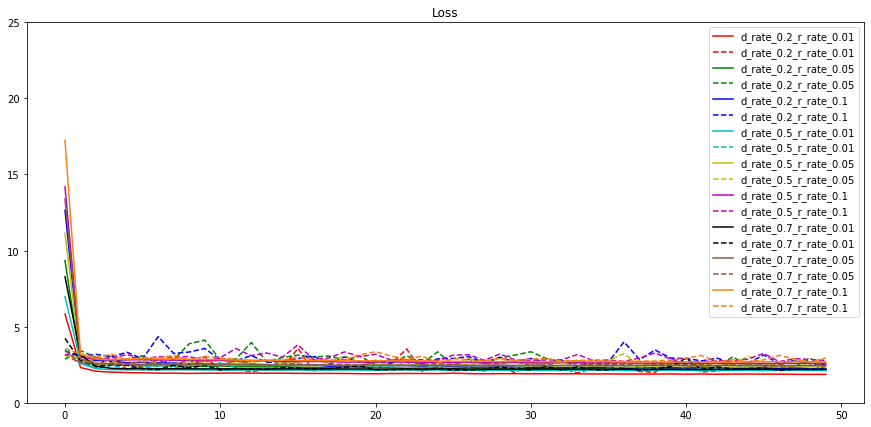

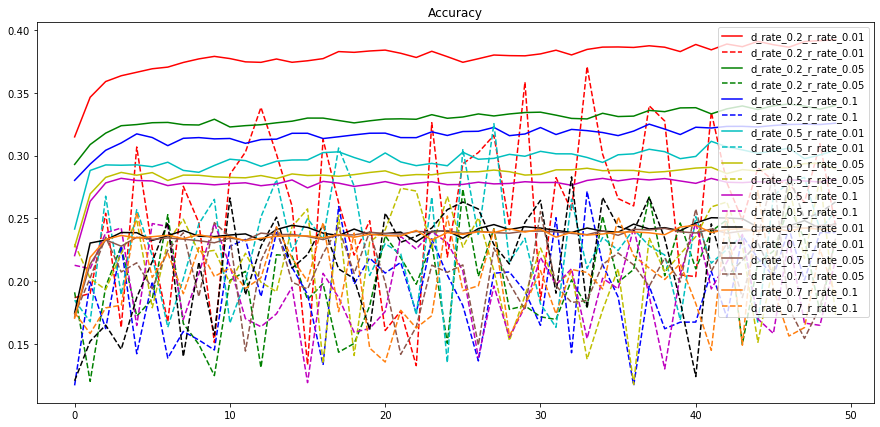

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "c", "y", "m", "k", "tab:brown", "tab:orange"]

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    print(i, cond)
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 25])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc=1)
plt.show()

In [85]:
len(results.keys())


9